In [1]:
import pandas as pd
import numpy as np

In [2]:
players = pd.read_csv("C:/Users/divya/OneDrive/Desktop/players_22.csv")

C:\Users\divya\AppData\Local\Temp\ipykernel_26816\3635896789.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv("C:/Users/divya/OneDrive/Desktop/players_22.csv")


In [3]:
players

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


In [4]:
#Based on these features we gonna perform clustering

features = ["overall", "potential", "value_eur", "wage_eur", "age"]

In [5]:
players = players.dropna(subset=features)

In [6]:
data = players[features].copy()

In [7]:
data

,overall,potential,value_eur,wage_eur,age
0,93,93,78000000.0,320000.0,34
1,92,92,119500000.0,270000.0,32
2,91,91,45000000.0,270000.0,36
3,91,91,129000000.0,270000.0,29
4,91,91,125500000.0,350000.0,30
...,...,...,...,...,...
19234,47,52,70000.0,1000.0,22
19235,47,59,110000.0,500.0,19
19236,47,55,100000.0,500.0,21
19237,47,60,110000.0,500.0,19


In [ ]:
1. Scale the data
2. Initial Random centroids
3. Label each data point
4. update centroids
5. Repeat 3,4 untill centroid stops changing

In [8]:
data = (data-data.min()) / (data.max() - data.min()) * 9 + 1

In [9]:
data.describe()

,overall,potential,value_eur,wage_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.131826,1.219443,4.063345
std,1.346635,1.191076,0.353229,0.501528,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.021620,1.012876,2.666667
50%,4.717391,5.304348,1.044817,1.064378,4.000000
75%,5.500000,6.086957,1.092370,1.193133,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [10]:
data.head()

,overall,potential,value_eur,wage_eur,age
0,10.000000,9.608696,4.618307,9.227468,7.000000
1,9.804348,9.413043,6.543654,7.939914,6.333333
2,9.608696,9.217391,3.087308,7.939914,7.666667
3,9.608696,9.217391,6.984396,7.939914,5.333333
4,9.608696,9.217391,6.822018,10.000000,5.666667


In [36]:
#Initializing random centroids
def random_centroids(data,k):
    centroids=[]
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [37]:
centroids = random_centroids(data,5)

In [41]:
centroids

,0,1,2,3,4
overall,4.130435,4.326087,5.304348,4.717391,4.326087
potential,5.891304,3.934783,3.739130,4.130435,6.478261
value_eur,1.231552,1.064534,1.015820,1.556309,1.073813
wage_eur,1.115880,1.630901,1.811159,1.000000,1.000000
age,6.000000,4.666667,4.333333,4.666667,4.666667


In [51]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [55]:
labels = get_labels(data, centroids)

In [56]:
labels.value_counts()

4    8172
1    4831
3    3466
0    2563
2     133
dtype: int64

In [59]:
#updating the centroids who is inside the cluster
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids


In [60]:
# To plot the cluster assignments
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [61]:
#Plotting the clusters

def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2) # converts several columns to 2 columns
    data_2d = pca.fit_transform(data) # runs the model
    centroids_2d = pca.transform(centroids.T)#----upto here converting to 2d data
    clear_output(wait=True) # from here we are plotting the data
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

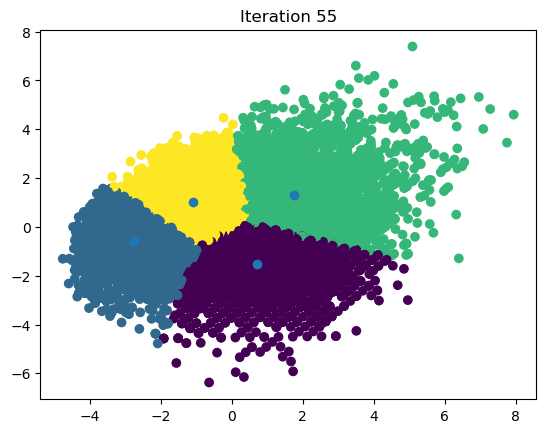

In [64]:
max_iterations = 100
centroid_count = 4

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [65]:
centroids

,0,1,2,3
overall,4.642364,2.583541,6.405155,4.311694
potential,4.369041,4.283190,6.512406,5.838660
value_eur,1.035494,1.013460,1.369797,1.062916
wage_eur,1.088135,1.017366,1.614006,1.074427
age,5.435779,2.483590,4.445231,2.700703


In [66]:
players[labels == 0][["short_name"] + features]

,short_name,overall,potential,value_eur,wage_eur,age
1464,L. Jiménez,75,75,1800000.0,4000.0,37
1466,L. López,75,75,1900000.0,15000.0,38
1467,A. Pyatov,75,75,625000.0,500.0,37
1474,J. Corona,75,75,625000.0,23000.0,40
1480,R. Pasveer,75,75,625000.0,8000.0,37
...,...,...,...,...,...,...
18867,S. Ghosh,51,51,40000.0,500.0,29
18888,Liu Xinyu,51,51,60000.0,2000.0,29
18971,Lalkhawpuimawia,51,51,60000.0,500.0,29
19100,J. Russell,49,49,15000.0,500.0,36


In [67]:
players[labels == 1][["short_name"] + features]

,short_name,overall,potential,value_eur,wage_eur,age
11593,Raphael Doninho,64,64,700000.0,5000.0,21
12250,D. Ferdiz,63,63,500000.0,500.0,21
12643,B. Miranda,63,65,625000.0,500.0,23
12871,M. Collao,63,65,625000.0,900.0,23
13552,S. Matthews,62,66,575000.0,2000.0,24
...,...,...,...,...,...,...
19234,Song Defu,47,52,70000.0,1000.0,22
19235,C. Porter,47,59,110000.0,500.0,19
19236,N. Logue,47,55,100000.0,500.0,21
19237,L. Rudden,47,60,110000.0,500.0,19


In [68]:
players[labels == 2][["short_name"] + features]

,short_name,overall,potential,value_eur,wage_eur,age
0,L. Messi,93,93,78000000.0,320000.0,34
1,R. Lewandowski,92,92,119500000.0,270000.0,32
2,Cristiano Ronaldo,91,91,45000000.0,270000.0,36
3,Neymar Jr,91,91,129000000.0,270000.0,29
4,K. De Bruyne,91,91,125500000.0,350000.0,30
...,...,...,...,...,...,...
6832,S. Román,68,73,1400000.0,650.0,26
7085,G. Guruceaga,68,73,1400000.0,500.0,26
7319,Sori Mané,68,75,2200000.0,5000.0,25
7329,N. Šipčić,68,73,1600000.0,4000.0,26


In [69]:
from sklearn.cluster import KMeans

In [70]:
kmeans = KMeans(4)
kmeans.fit(data)

KMeans(n_clusters=4)

In [71]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2,3
overall,3.039718,4.887068,4.720860,6.719008
potential,4.707890,6.140981,4.426332,6.635831
value_eur,1.019051,1.101508,1.036383,1.558856
wage_eur,1.021943,1.145291,1.095887,1.915451
age,2.636513,3.043387,5.572110,5.018090
